In [ ]:
import pandas as pd

datos = pd.read_csv('./housing.csv')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

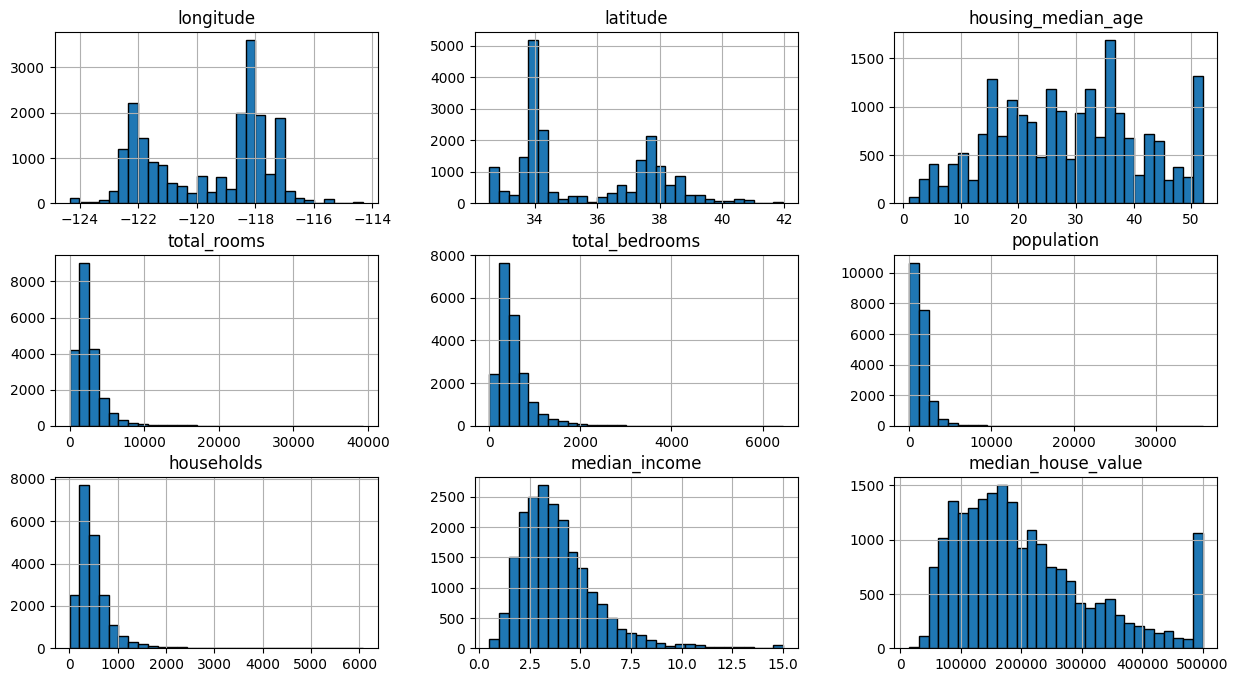

In [ ]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

In [ ]:
datos = datos[datos['housing_median_age']<40] #Establece un límite fijo de 50, pero asegura de que las casas más antiguas no se incluyan en ese límite.
datos = datos[datos['median_house_value']<500000]#Las casas con un precio superior a 500k no se incluyan en el grupo.
datos = datos[datos['median_income']<15]#Impide que los salarios medios queden incluidos dentro del límite.
datos = datos[datos['population']>7000]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

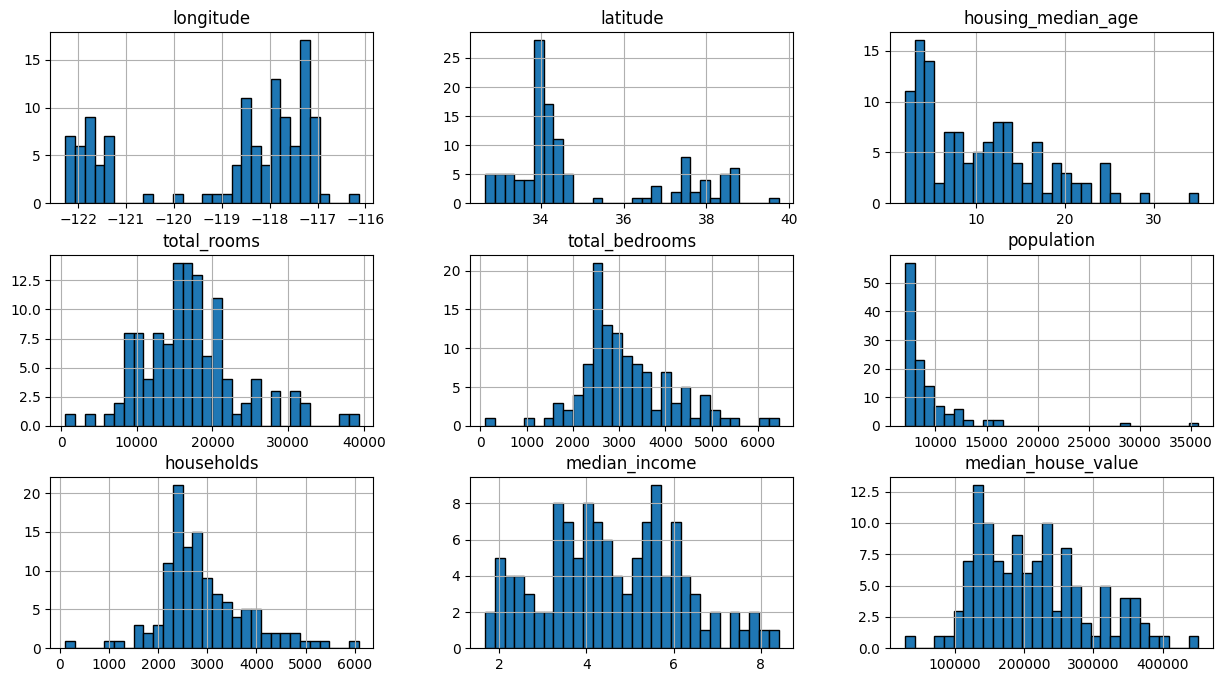

In [ ]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

In [ ]:
datos.isnull().sum() # valores nulos

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,1
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
datos = datos.dropna() #elimina los registros nulos.

In [ ]:
dummies_ocean = pd.get_dummies(datos["ocean_proximity"], dtype=int)#convierte a dummies las categorias de ocean_proximity

In [ ]:
datos = pd.concat([datos, dummies_ocean], axis=1)
datos = datos.drop(["ocean_proximity"], axis=1)

In [ ]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
570,-122.24,37.72,5.0,18634.0,2885.0,7427.0,2718.0,7.6110,350700.0,0,0,1,0
864,-122.01,37.57,14.0,16199.0,2993.0,8117.0,2847.0,5.8322,281800.0,0,0,1,0
865,-122.04,37.58,14.0,14917.0,2708.0,8012.0,2606.0,5.6277,269800.0,0,0,1,0
871,-122.07,37.52,3.0,14014.0,2861.0,7205.0,2753.0,6.0824,273500.0,0,0,1,0
922,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18926,-122.17,38.08,7.0,18392.0,2782.0,8276.0,2742.0,6.4232,229200.0,0,0,1,0
18985,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,81300.0,0,1,0,0
20249,-119.25,34.21,12.0,15201.0,2418.0,7132.0,2251.0,5.6756,301800.0,0,0,0,1
20451,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,1,0,0,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 570 to 20530
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           118 non-null    float64
 1   latitude            118 non-null    float64
 2   housing_median_age  118 non-null    float64
 3   total_rooms         118 non-null    float64
 4   total_bedrooms      118 non-null    float64
 5   population          118 non-null    float64
 6   households          118 non-null    float64
 7   median_income       118 non-null    float64
 8   median_house_value  118 non-null    float64
 9   <1H OCEAN           118 non-null    int64  
 10  INLAND              118 non-null    int64  
 11  NEAR BAY            118 non-null    int64  
 12  NEAR OCEAN          118 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 12.9 KB


In [ ]:
datos.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.944560,-0.165452,0.051410,0.030637,-0.019566,-0.018715,0.013685,-0.003113,0.246196,-0.060624,-0.469827,0.085657
latitude,-0.944560,1.000000,0.064979,-0.014996,-0.025508,-0.009624,0.011709,-0.051711,-0.101471,-0.359885,0.289132,0.389689,-0.203302
housing_median_age,-0.165452,0.064979,1.000000,-0.479823,-0.285190,-0.063152,-0.221935,-0.419530,-0.145739,0.143904,-0.129716,-0.030699,-0.003336
total_rooms,0.051410,-0.014996,-0.479823,1.000000,0.833101,0.570362,0.803130,0.423470,0.261021,0.057087,-0.050323,-0.057151,0.035666
total_bedrooms,0.030637,-0.025508,-0.285190,0.833101,1.000000,0.586977,0.975644,-0.015916,0.036570,0.183217,-0.148420,-0.102712,0.022815
population,-0.019566,-0.009624,-0.063152,0.570362,0.586977,1.000000,0.626894,-0.048457,-0.050325,0.178297,-0.113341,-0.118894,-0.013368
households,-0.018715,0.011709,-0.221935,0.803130,0.975644,0.626894,1.000000,0.000732,0.074401,0.175217,-0.155154,-0.078394,0.026745
median_income,0.013685,-0.051711,-0.419530,0.423470,-0.015916,-0.048457,0.000732,1.000000,0.782626,-0.074026,-0.097558,0.240215,0.082123
median_house_value,-0.003113,-0.101471,-0.145739,0.261021,0.036570,-0.050325,0.074401,0.782626,1.000000,0.156998,-0.385916,0.199646,0.203067
<1H OCEAN,0.246196,-0.359885,0.143904,0.057087,0.183217,0.178297,0.175217,-0.074026,0.156998,1.000000,-0.721193,-0.247717,-0.294518


<Axes: >

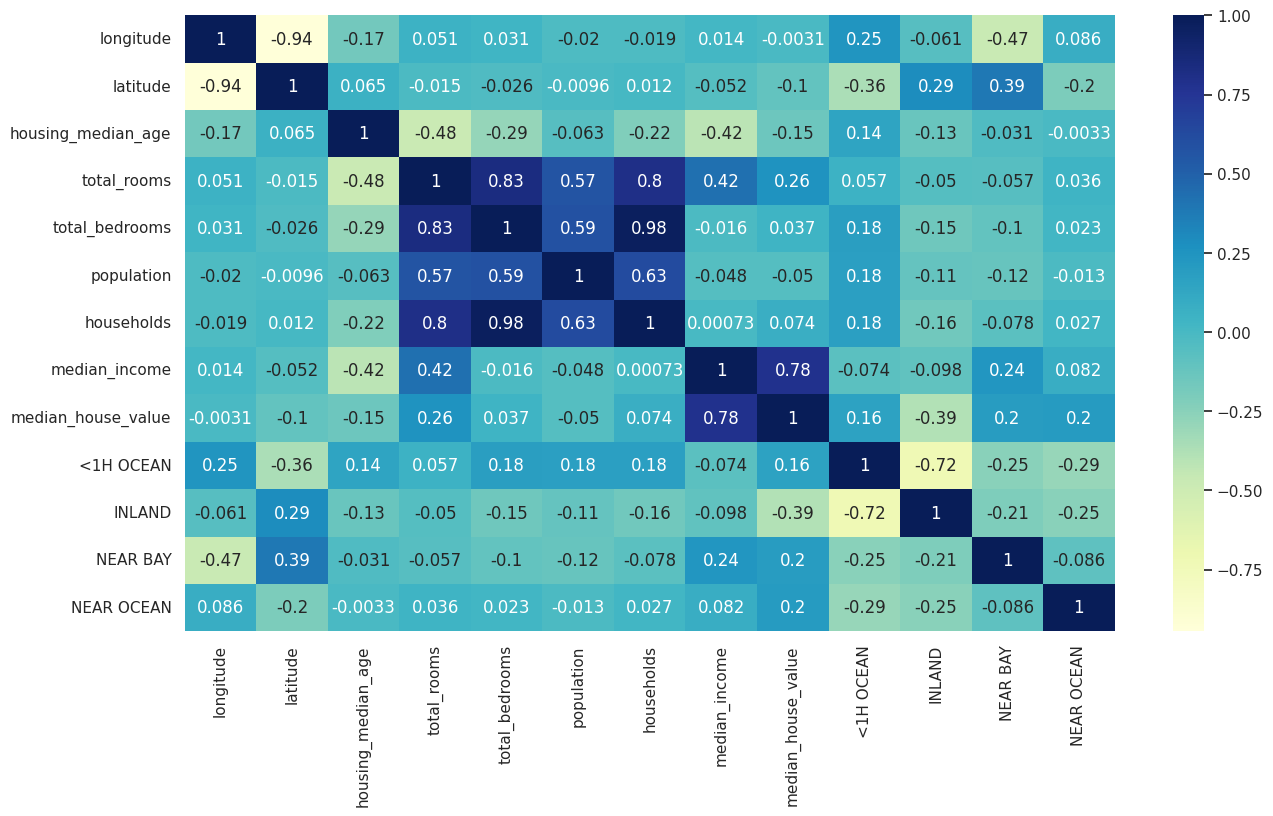

In [ ]:
import seaborn as sb
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

In [ ]:
datos.drop('INLAND', axis = 1, inplace = True)

In [ ]:
datos["bedroom_ratio"] = datos["total_rooms"] / datos["total_bedrooms"]
datos['habitaciones_den'] = datos['total_rooms']/ datos['households'] # Habitaciones disponibles por area.
datos['mayor_esp_poder_adq'] = datos['median_income']/ datos['bedroom_ratio']
datos['poder_adq'] = datos['median_income']/datos['population']

<Axes: >

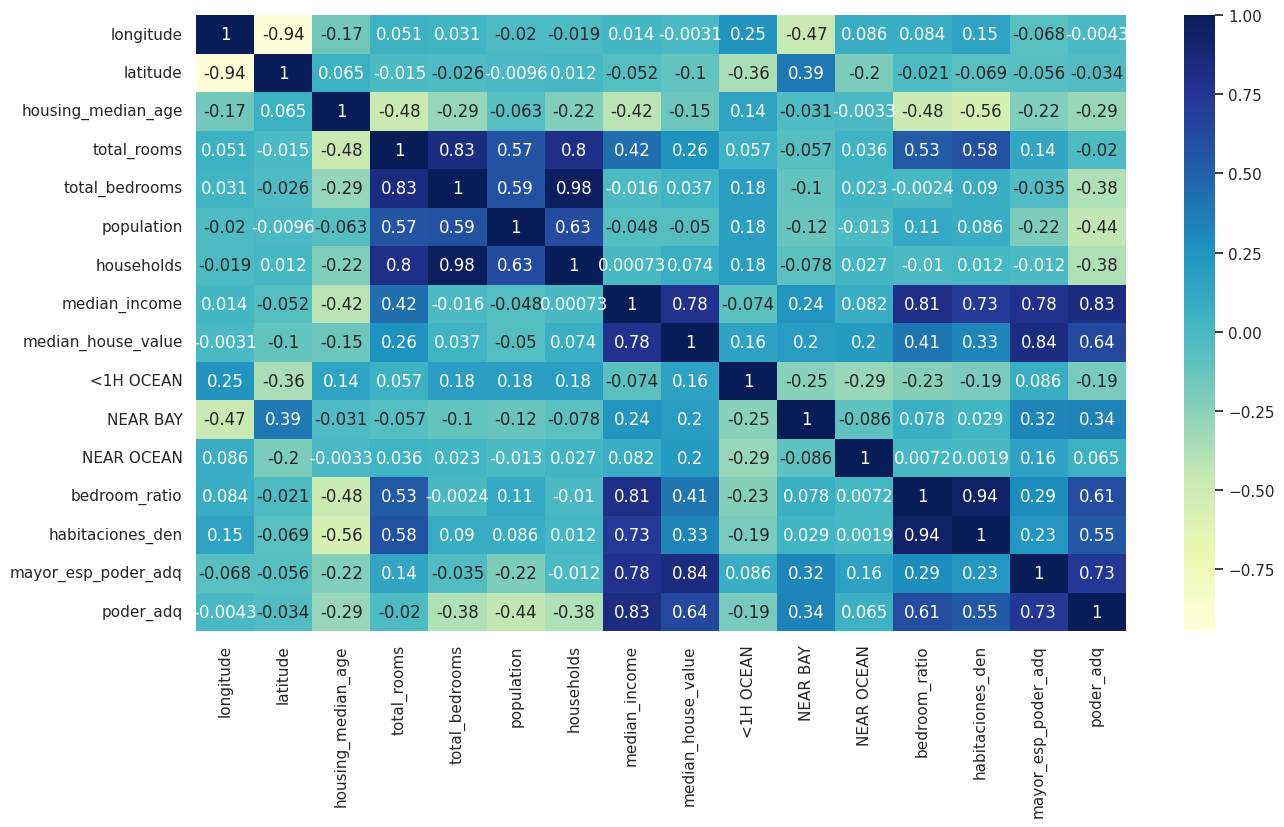

In [ ]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")
# Aquí se nota que las características anteriores presentan una correlación significativa con la etiqueta.

In [ ]:
X = datos.drop(["median_house_value"], axis=1)
y = datos["median_house_value"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
prediccion = modelo.predict(X_test)

In [ ]:
comparar = {"Prediccion": prediccion, "Valor Real": y_test}
pd.DataFrame(comparar)

,Prediccion,Valor Real
11775,160999.450539,169300.0
13848,108747.512906,122100.0
922,387931.926275,451100.0
9166,226708.469044,194600.0
6297,253632.221212,226200.0
20451,295807.708087,321300.0
12194,149630.885985,162200.0
3177,34739.608234,106300.0
13890,77067.482708,137500.0
12215,193173.399588,212300.0


In [ ]:
modelo.score(X_train, y_train) #datos de entrenamiento > 80

0.8171008093327286

In [ ]:
modelo.score(X_test, y_test) #datos de prueba.

0.7700994876605234

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediccion)
import numpy as np
rmse = np.sqrt(mse)
rmse

46867.6326869837

In [ ]:
# Se normalizan los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
modelo.fit(X_train_scaled , y_train)

LinearRegression()

In [37]:
modelo.score(X_train_scaled, y_train)

0.8171008093327286

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, prediccion)

mse = np.sqrt(mse) # valor promedio de "fallo" al predecir los precios de las casas con valores conocidos

mse

46867.6326869837

In [ ]:
#El resultado fue favorable, alcanzando el 81% de precisión.
#Esto se debe a que, aunque existen límites fijos en algunas características, el modelo logró capturar las relaciones principales
#en los datos y generar una predicción precisa.


In [ ]:
#Los cambios realizados, como el manejo de valores en el límite y el uso de técnicas de preprocesamiento,
#ayudaron a reducir el sesgo y mejorar la calidad de los datos.

In [ ]:
# Ejercicio 2
#Utilizando el conjunto de datos de casas del ejercicio realizado en clase, (Ejercicio
#de Regresión Lineal) aplique ahora, el algoritmo Árbol de decisión, evalúe los
#datos y grafique la relación entre las características, dibujando el diagrama del
#árbol obtenido, el % de precisión, y demás datos utilizados en clase.

In [41]:
from sklearn.tree import DecisionTreeRegressor

modeloarbol = DecisionTreeRegressor(max_depth=5)
modeloarbol.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [42]:
prediccionesTree = modeloarbol.predict(X_test)

In [44]:
modeloarbol.score(X_test, y_test) #datos de prueba

0.7120070221151265

In [47]:
modeloarbol.score(X_train, y_train) #datos de entrenamiento

0.9405348194312125

[Text(0.5773809523809523, 0.9166666666666666, 'mayor_esp_poder_adq <= 0.889\n5641527043.911\n94\n210638.298'),
 Text(0.2916666666666667, 0.75, 'mayor_esp_poder_adq <= 0.742\n1963377408.264\n55\n161930.909'),
 Text(0.43452380952380953, 0.8333333333333333, 'True  '),
 Text(0.15476190476190477, 0.5833333333333334, 'housing_median_age <= 24.0\n1301201927.083\n24\n130987.5'),
 Text(0.09523809523809523, 0.4166666666666667, 'bedroom_ratio <= 4.932\n779995723.14\n22\n137913.636'),
 Text(0.047619047619047616, 0.25, 'population <= 7011.5\n324740661.157\n11\n123545.455'),
 Text(0.023809523809523808, 0.08333333333333333, '0.0\n1\n87200.0'),
 Text(0.07142857142857142, 0.08333333333333333, '211905600.0\n10\n127180.0'),
 Text(0.14285714285714285, 0.25, 'longitude <= -117.175\n822361487.603\n11\n152281.818'),
 Text(0.11904761904761904, 0.08333333333333333, '634121728.395\n9\n144077.778'),
 Text(0.16666666666666666, 0.08333333333333333, '3610000.0\n2\n189200.0'),
 Text(0.21428571428571427, 0.4166666666

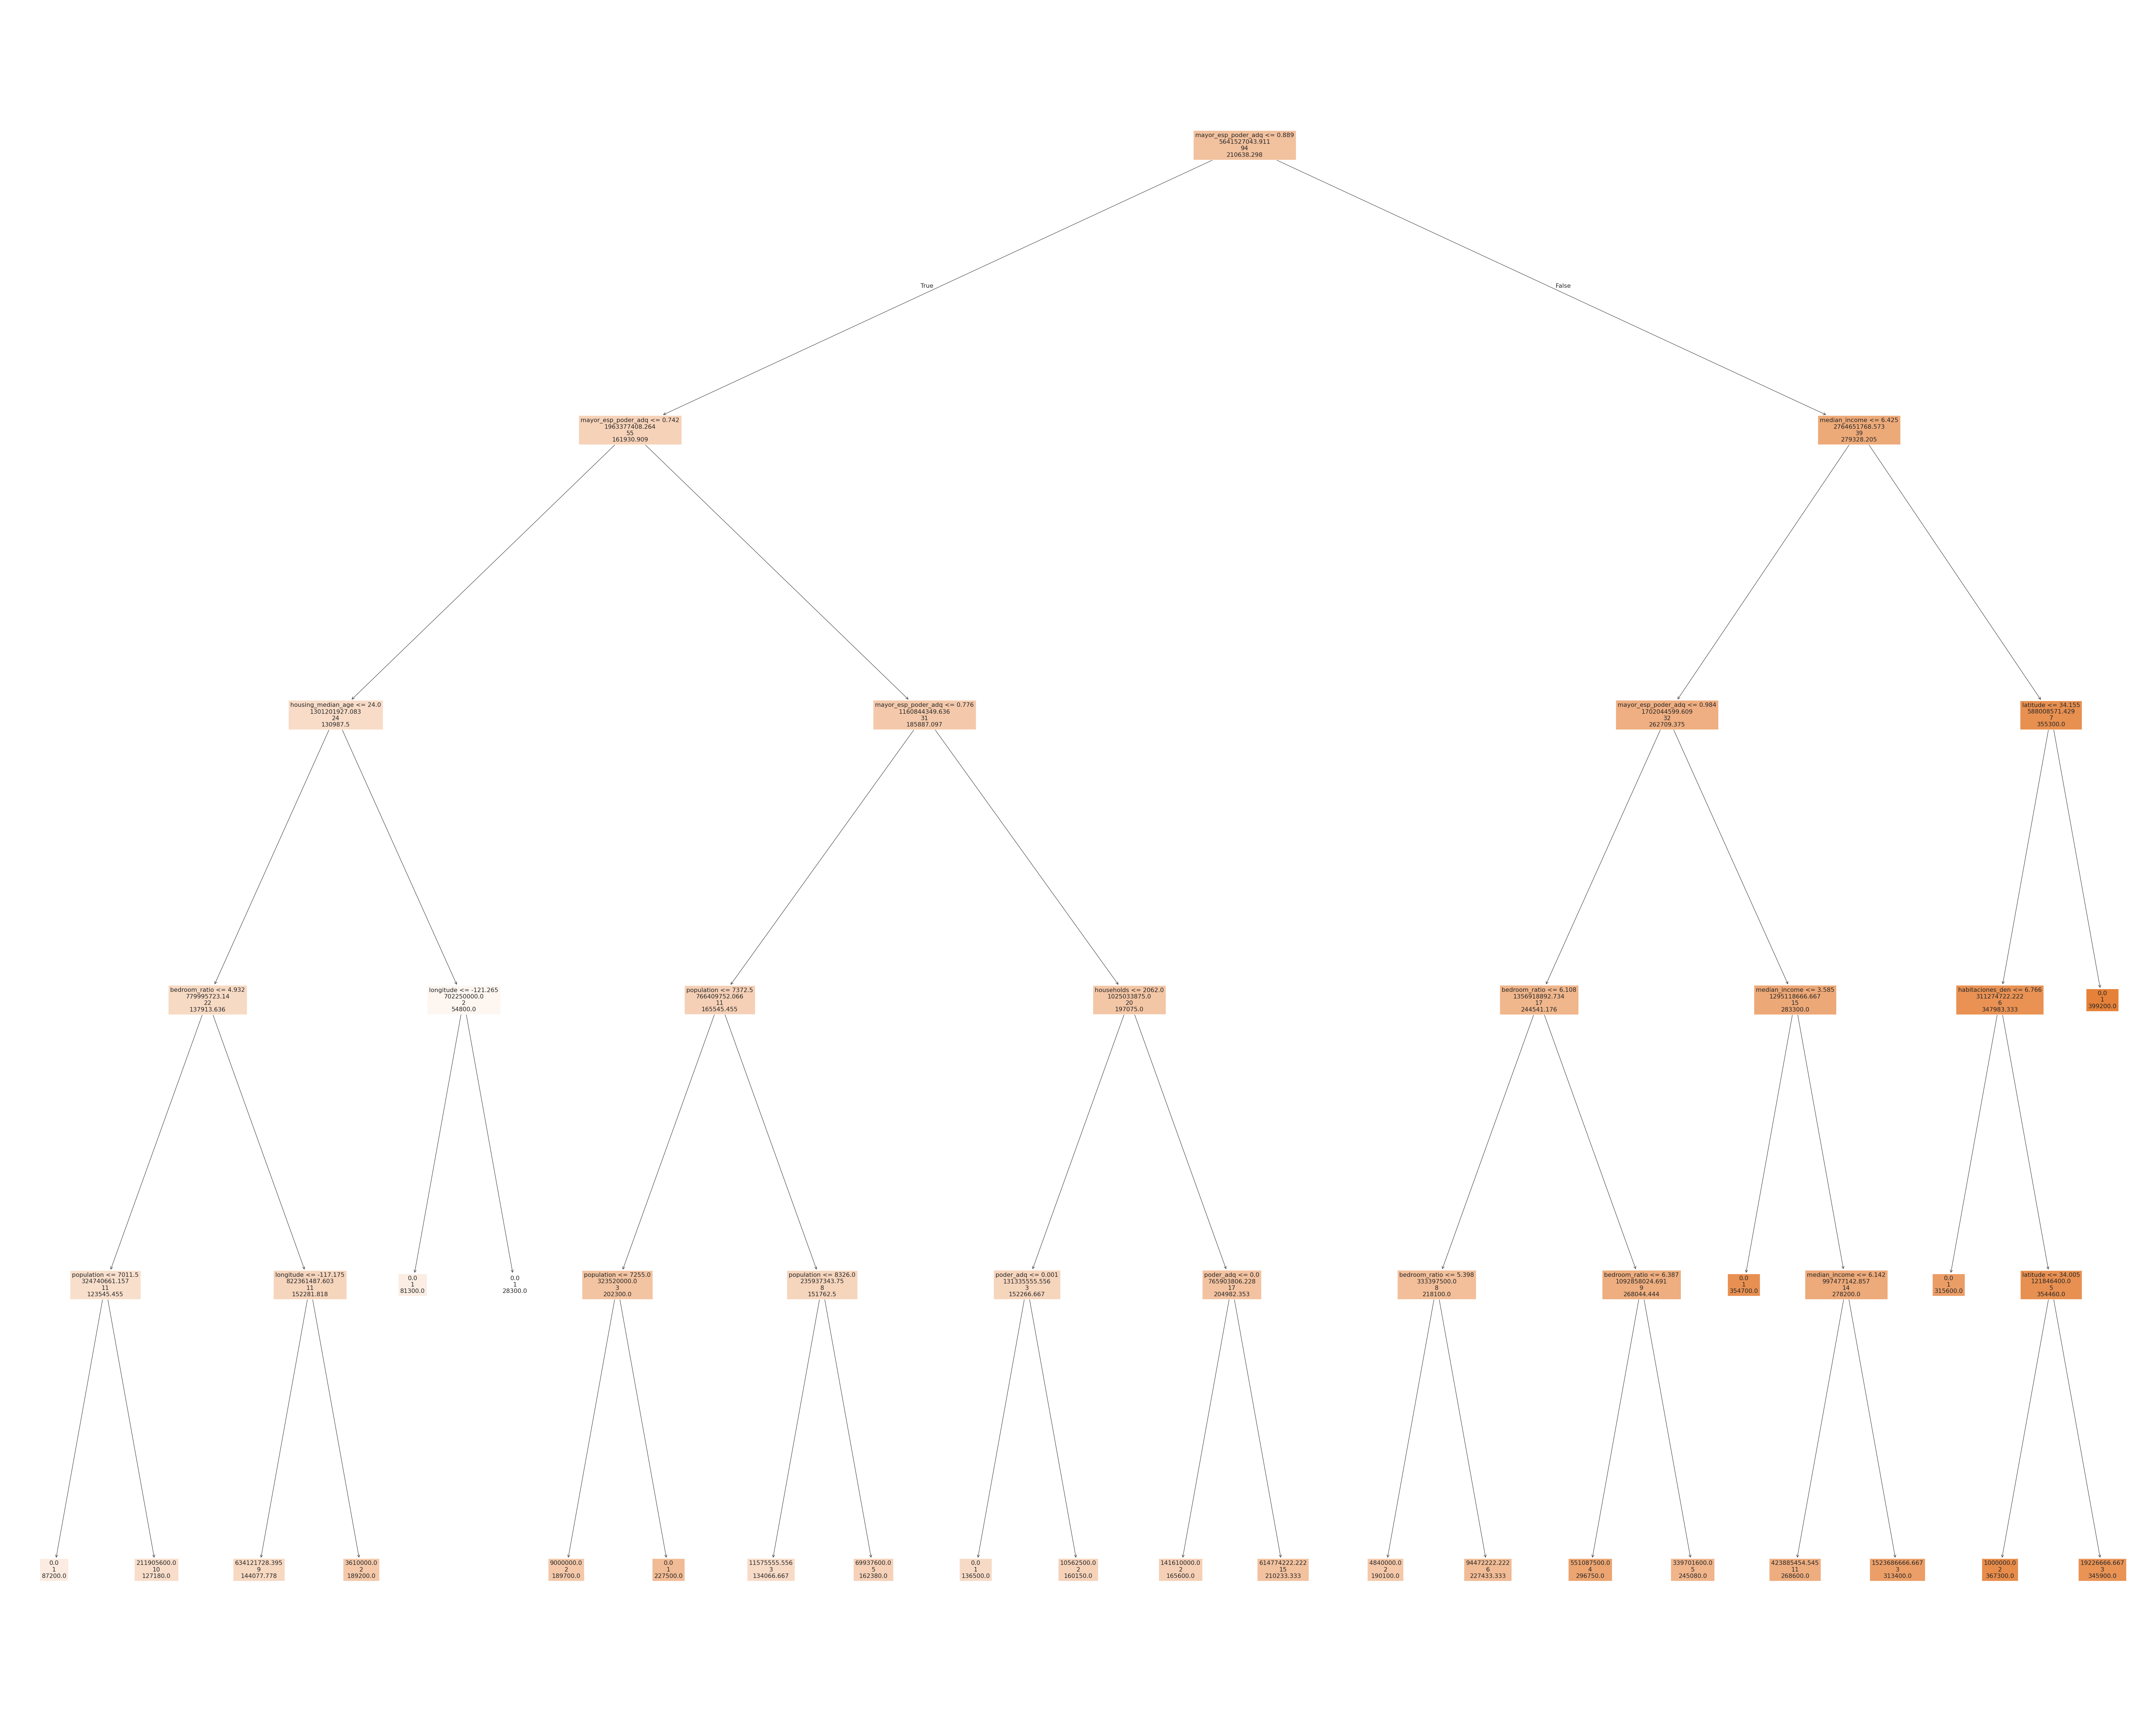

In [48]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modeloarbol,
    feature_names=X_train.columns,
    filled=True,
    label='none'
)

In [ ]:
#Su empresa se dedica a recibir dispositivos para repararlos. En algunos casos, no
#se puede reparar y deben solicitar un dispositivo nuevo. Cuentan con una base de
#datos muy grande donde se registra el estado de cada componente del dispositivo,
#y un dato final indicando si pudo repararse o si fue necesario solicitar un dispostivo nuevo.
#Le solicitan que haga y entrene un modelo con esos datos, para que al final se
#ingresen los datos de los componentes, y muestre una predicción indicando si el
#dispostivo puede repararse, o si debe solicitarse uno nuevo.

In [ ]:
#¿Qué tipo de modelo aplicaría?

#árbol de decisiones, ya que el objetivo es predecir si el dispositivo puede repararse o si es necesario solicitar uno nuevo.

In [ ]:
#¿Por qué consideras que ese modelo es adecuado?

#Los árboles de decisiones son fáciles de interpretar. Puedes visualizar cómo se toman las decisiones y entender qué características o
#componentes del dispositivo influyen más en la decisión de si se puede reparar o no.

In [ ]:
#¿De qué manera considera que es diferente a la programación regular, para este tipo de proyectos?

#En programación regular se escriben instrucciones claras y específicas,
#mientras que en machine learning el modelo aprende de los datos para hacer predicciones sin reglas predefinidas.


In [ ]:
#¿Por qué cree que los modelos como los vistos en las clases no logran llegar a un 100% de respuestas correctas?
# Los modelos no siempre aciertan al 100% porque los datos pueden tener errores o ser muy complejos, y siempre hay algo de incertidumbre.